# Exploratory Data Analysis
## 13
Here you'll bring together some of the individual skills that you demonstrated above and create a Jupyter notebook based blog post on data analysis.

1. Find a dataset that interests you and relates to a question or problem that you find intriguing
2. Using a Jupyter notebook, describe the dataset, the source of the data, and the reason the dataset was of interest.
3. Check the data and see if they need to be cleaned: are there missing values? Are there clearly erroneous values? Do two tables need to be merged together? Clean the data so it can be visualized.
3. Plot the data, demonstrating interesting features that you discover. Are there any relationships between variables that were surprising or patterns that emerged? Please exercise creativity and curiosity in your plots.
4. What insights are you able to take away from exploring the data? Is there a reason why analyzing the dataset you chose is particularly interesting or important? Summarize this as if your target audience was the readership of a major news organization - boil down your findings in a way that is accessible, but still accurate.
5. Create a public repository on your github account titled "machine-learning-course". In it, create a readme file that contains the heading "ECE590: Introductory Machine Learning for Data Science". Add, commit, and push that Jupyter notebook to the master branch. Provide the link to the that post here.

**Answer**

***1. Inspiration***

I am interested in what factors influence employees's attrition in companies. A major problem of high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Organizations always wants to figure out what factors influence employees' attrition, in this way they could work out better strategy to retain excellent employees.



***2. Question of Interest***

What are some important predictors influence employees' attrition?

***3. Data Source***

This is a fictional dataset provided by IBM data scientists which has 1470 rows and 35 variables. 

***4. EDA***

***4.1 Overview***

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
hr_data = pd.read_csv("/Users/wisophia/Documents/MIDS/2019 spring/IDS 705/HW/assignment1/hrdataset.csv",sep = '\t')

Let's get a glimpse of data.

In [34]:
hr_data.head()

,Age,Attrition,Education,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,2,1,3,2,4,5993,1,11,3,0,8,0,1,6,0
1,49,0,1,0,2,2,2,5130,0,23,4,1,10,3,3,10,1
2,37,1,2,0,2,1,3,2090,1,15,3,0,7,3,3,0,0
3,33,0,4,1,3,1,3,2909,1,11,3,0,8,3,3,8,3
4,27,0,1,0,3,1,2,3468,0,12,3,1,6,3,3,2,2


From this table above, we can see that there are some categorical variables we should encode latter. Now, let us check if this dataset has any missing value.

In [35]:
display(hr_data.isnull().any())

Age                        False
Attrition                  False
Education                  False
Gender                     False
JobInvolvement             False
JobLevel                   False
JobSatisfaction            False
MonthlyIncome              False
OverTime                   False
PercentSalaryHike          False
PerformanceRating          False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
WorkLifeBalance            False
YearsAtCompany             False
YearsSinceLastPromotion    False
dtype: bool

We are lucky that we don't have missing values in this dataset! 
Next, let us check the distribution of each variables from their mean and std.

In [36]:
hr_data.describe()

,Age,Attrition,Education,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.912925,0.400000,2.729932,2.063946,2.728571,6502.931293,0.282993,15.209524,3.153741,0.793878,11.279592,2.799320,2.761224,7.008163,2.187755
std,9.135373,0.367863,1.024165,0.490065,0.711561,1.106940,1.102846,4707.956783,0.450606,3.659938,0.360824,0.852077,7.780782,1.289271,0.706476,6.126525,3.222430
min,18.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,0.000000,2.000000,1.000000,2.000000,2911.000000,0.000000,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,0.000000
50%,36.000000,0.000000,3.000000,0.000000,3.000000,2.000000,3.000000,4919.000000,0.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,1.000000
75%,43.000000,0.000000,4.000000,1.000000,3.000000,3.000000,4.000000,8379.000000,1.000000,18.000000,3.000000,1.000000,15.000000,3.000000,3.000000,9.000000,3.000000
max,60.000000,1.000000,5.000000,1.000000,4.000000,5.000000,4.000000,19999.000000,1.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000


There aren't clear errorness in numerical variables. Let's check the correlation plot of hr_data.

***4.2 Correlation between different predictors ***

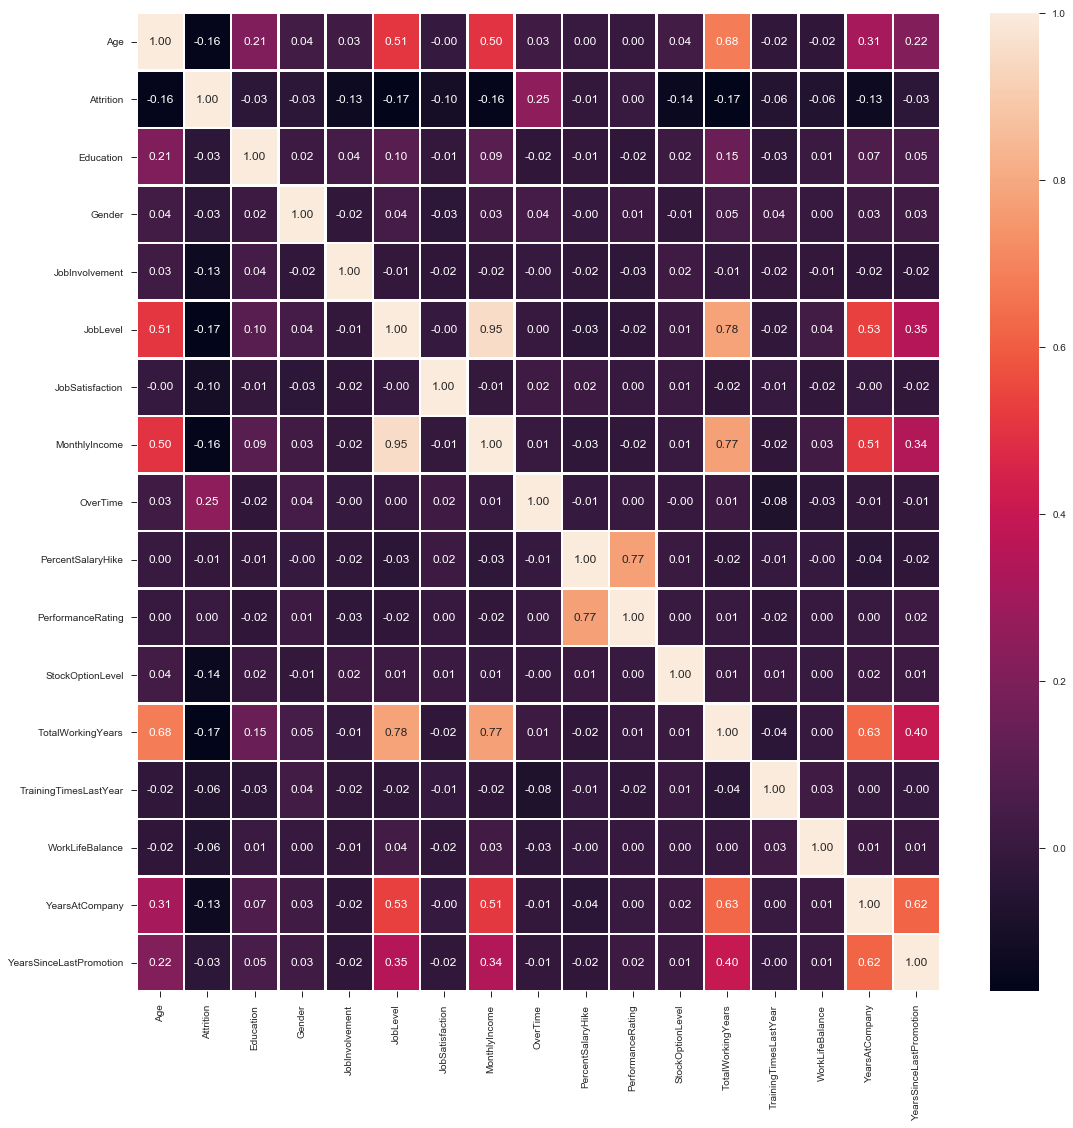

In [80]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(hr_data.corr(), linewidths=1.5, linecolor="white",annot=True,fmt=".2f")
plt.show()   

(1)"Totallyworkingyear" and "Monthly income" , "joblevel" has a correlation close to 0.8. 

(2)"Totallyworkingyear" and "Age" has a correlation of 0.68 which make sense. 

(3)"Performance rating" and "Percentsalaryhike" has a correlation of 0.8 which make sense.

*** 4.3 Gender/Education/MonthlyIncome and Attrition ***

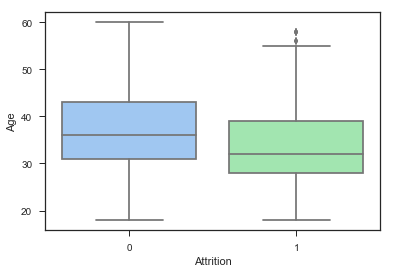

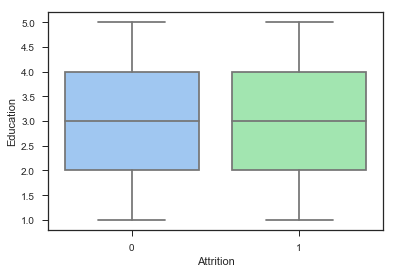

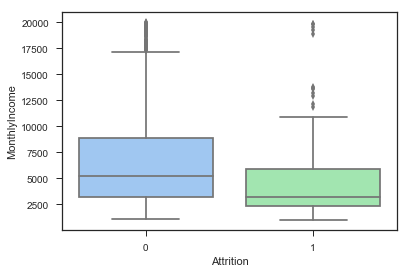

In [96]:
ax = sns.boxplot(x="Attrition", y="Age", data=hr_data)  
plt.show()
ax = sns.boxplot(x="Attrition", y="Education", data=hr_data)
plt.show()
ax = sns.boxplot(x="Attrition", y="MonthlyIncome", data=hr_data)
plt.show()

Since most of the variables of this dataset are categorical variables, we could hardly found out possible association between 2 catogorical variables through graph.

***5 Insight ***

(1)From plot1 we can see, the average age of employees who left their companies is close to 31.5, while the average age of employees who stayed in their companies is near 36.5. It indicates that company might put extra attention to younger employees if they want to mainthem them.

(2)The average education of employees who left or stayed in the companies are quite similar.

(3)The average monthly income of the employees who left is 3000, while for employee who stay is 5000. When we combine the observation from (1), we might find that employees in lower joblevels might be the group that have higher probability to leave. If the company want to cultivate employees from early career of their own, they may figure out factors that influence younger employees' attrition and design new plan to satisfy their need.